In [32]:
import pandas as pd

# штатный механизм Create Model - Supervised Learning Estimators - Linear Regression
from sklearn.linear_model import LinearRegression
# штатный механизм Training and Test Data из Scikit
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

**Возьмите датасет** Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [118]:
# исходный Excel со значениями производственных показателей по площадкам (СК)
df = pd.read_csv(r'c:\Users\petrenkovn\Dropbox\DS-22\Data_Files\kaggle_datasets\water.csv')
# сразу копия датафрейма, пригодится при нарезке датасета на две группы
df_copy = df

# df

**Задача - ответить на вопрос**: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

**Задание.** Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

# Регрессионная модель для всего датасета

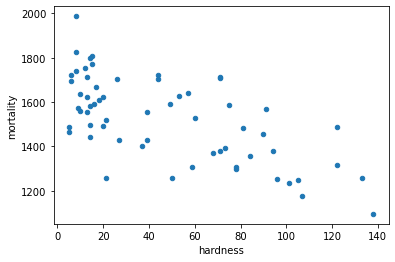

In [113]:
df.plot(kind='scatter', x='hardness', y='mortality')

**Промежуточный вывод при взгляде на график рассеяния**: можно предположить, что есть **обратная зависимость** между смертностью и содержанием кальция.

In [35]:
# расчет коэффициента корелляции между двумя переменными средствами Pandas. По формуле Пирсона либо Кендалла либо Спирмена
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


**Коэффициент корреляции -0,65** говорит о достаточно сильной обратной связи (не обязательно причинно-следственной).

In [36]:
# определение параметров для линейной регрессии
# независимая переменная - датафрейм, в данном случае из одного столбца (ищем корреляцию с одной независимой переменной)
# независимая переменная - жесткость воды
X = df[['hardness']]
print(type(X))
# зависимая переменная - серия
# зависимая переменная - смертность
y = df['mortality']

# X, y

<class 'pandas.core.frame.DataFrame'>


In [37]:
# разделение на тренировочный сегмент и тестовый сегмент с помощью специального метода. 
# Random_state=42 это бестпрактис, еще можно 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(type(X_train),type(X_test),type(y_train),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [38]:
# создание объекта на основе класса
model = LinearRegression()
print(type(model))

# запуск обучения - метод класса. "Fit linear model". Механизм SciKit - Model Fitting - Supervised learning
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

# результаты модели - атрибут класса. Массив Numpy коэффициентов независимых переменных. В нашем случае один элемент.
# результаты модели - атрибут класса. Независимый член
model.coef_, model.intercept_

<class 'sklearn.linear_model._base.LinearRegression'>


(array([-3.13167087]), 1668.9722977277095)

**Уравнение линейной регрессии:**

In [39]:
lr_coef = model.coef_[0]
lr_const = model.intercept_

print(f'mortality = {lr_coef} * hardness + {lr_const}')

mortality = -3.1316708721378266 * hardness + 1668.9722977277095


In [40]:
# запуск прогнозирования - метод класса. "Predict using the linear model". На входе - тестовый сегмент, независимая переменная. Механизм SciKit - Prediction - Supervised estimators
y_pred = model.predict(X_test)

In [41]:
# оценка модели - метод класса. "Return the coefficient of determination  of the prediction". На входе - тестовый сегмент, и зависимая и независимая переменная. Механизм SciKit - Evaluate Model Performance - Classification Metrics (Estomator score method)
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

**Коэффициент детерминации 0,5** говорит о том, что 50% дисперсии зависимой переменной определяются независимой переменной. Довольно значительно.

**Сравнение результатов регрессионной модели с фактическими данными** на тестовом сегменте

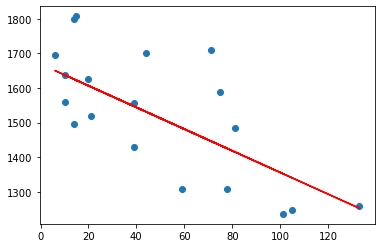

In [42]:
# вывод скаттерплота тестовых сегментов
plt.scatter(X_test, y_test)
# вывод линии тестовый сегмент независимой переменной, спрогнозированный сегмент
plt.plot(X_test, y_pred, c='r')

Фактические наблюдения распределены более-менее одинаково относительно линии регрессии.

**Анализ остатков**

In [47]:
# расчет остатков на всем множестве данных
df['mortality.predicted'] = lr_coef * df['hardness'] + lr_const
df['mortality.resid'] = df['mortality'] - df['mortality.predicted']

df

,Unnamed: 0,location,town,mortality,hardness,mortality.predicted,mortality.resid
0,1,South,Bath,1247,105,1340.146856,-93.146856
1,2,North,Birkenhead,1668,17,1615.733893,52.266107
2,3,South,Birmingham,1466,5,1653.313943,-187.313943
3,4,North,Blackburn,1800,14,1625.128906,174.871094
4,5,North,Blackpool,1609,18,1612.602222,-3.602222
...,...,...,...,...,...,...,...
56,57,South,Walsall,1527,60,1481.072045,45.927955
57,58,South,West Bromwich,1627,53,1502.993742,124.006258
58,59,South,West Ham,1486,122,1286.908451,199.091549
59,60,South,Wolverhampton,1485,81,1415.306957,69.693043


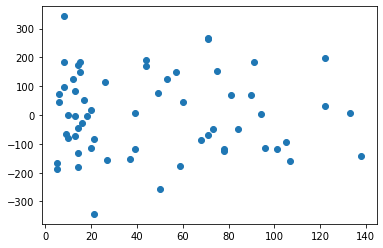

In [45]:
plt.scatter(df['hardness'], df['mortality.resid'])

(array([ 1.,  1.,  8., 12.,  9.,  8.,  9., 10.,  2.,  1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

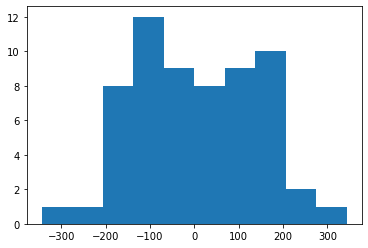

In [46]:
plt.hist(df['mortality.resid'])

**Вывод по графикам остатков**: распределены хаотично, без особых закономерностей и систематических составляющих. Качество модели вполне хорошее для всего датасета.

# Регрессионная модель для подмножества датасета - *северные* города

In [114]:
df = df_copy[ df_copy['location'] == 'North' ]

# df

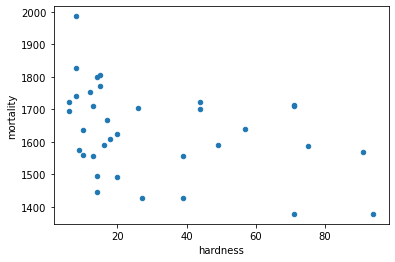

In [115]:
df.plot(kind='scatter', x='hardness', y='mortality')

**Промежуточный вывод при взгляде на график рассеяния**: можно предположить, что есть **довольно слабая обратная зависимость** между смертностью и содержанием кальция, совсем не такая, как на всем датасете.

In [50]:
# расчет коэффициента корелляции между двумя переменными средствами Pandas. По формуле Пирсона либо Кендалла либо Спирмена
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


**Коэффициент корреляции -0,36** говорит о **слабой** обратной связи (не обязательно причинно-следственной).

In [51]:
# определение параметров для линейной регрессии
# независимая переменная - датафрейм, в данном случае из одного столбца (ищем корреляцию с одной независимой переменной)
# независимая переменная - жесткость воды
X = df[['hardness']]
print(type(X))
# зависимая переменная - серия
# зависимая переменная - смертность
y = df['mortality']

# X, y

<class 'pandas.core.frame.DataFrame'>


In [52]:
# разделение на тренировочный сегмент и тестовый сегмент с помощью специального метода. 
# Random_state=42 это бестпрактис, еще можно 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(type(X_train),type(X_test),type(y_train),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [53]:
# создание объекта на основе класса
model = LinearRegression()
print(type(model))

# запуск обучения - метод класса. "Fit linear model". Механизм SciKit - Model Fitting - Supervised learning
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

# результаты модели - атрибут класса. Массив Numpy коэффициентов независимых переменных. В нашем случае один элемент.
# результаты модели - атрибут класса. Независимый член
model.coef_, model.intercept_

<class 'sklearn.linear_model._base.LinearRegression'>


(array([-1.97686226]), 1688.150229031281)

**Уравнение линейной регрессии:**

In [54]:
lr_coef = model.coef_[0]
lr_const = model.intercept_

print(f'mortality = {lr_coef} * hardness + {lr_const}')

mortality = -1.9768622600638235 * hardness + 1688.150229031281


In [55]:
# запуск прогнозирования - метод класса. "Predict using the linear model". На входе - тестовый сегмент, независимая переменная. Механизм SciKit - Prediction - Supervised estimators
y_pred = model.predict(X_test)

In [56]:
# оценка модели - метод класса. "Return the coefficient of determination  of the prediction". На входе - тестовый сегмент, и зависимая и независимая переменная. Механизм SciKit - Evaluate Model Performance - Classification Metrics (Estomator score method)
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.018885304285745863

 **Коэффициент детерминации 0,02** говорит о том, что дисперсия зависимой переменной почти не объясняется дисперсией независимой и сложена скорее из дисперсии остатков.

**Сравнение результатов регрессионной модели с фактическими данными** на тестовом сегменте

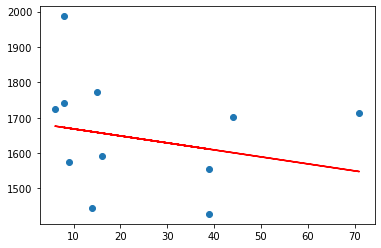

In [57]:
# вывод скаттерплота тестовых сегментов
plt.scatter(X_test, y_test)
# вывод линии тестовый сегмент независимой переменной, спрогнозированный сегмент
plt.plot(X_test, y_pred, c='r')

Фактические наблюдения распределены более-менее одинаково относительно линии регрессии.

**Анализ остатков**

In [58]:
# расчет остатков на всем множестве данных
df['mortality.predicted'] = lr_coef * df['hardness'] + lr_const
df['mortality.resid'] = df['mortality'] - df['mortality.predicted']

df

<ipython-input-58-8b2f90eb036b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mortality.predicted'] = lr_coef * df['hardness'] + lr_const
<ipython-input-58-8b2f90eb036b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mortality.resid'] = df['mortality'] - df['mortality.predicted']


,Unnamed: 0,location,town,mortality,hardness,mortality.predicted,mortality.resid
1,2,North,Birkenhead,1668,17,1654.543571,13.456429
3,4,North,Blackburn,1800,14,1660.474157,139.525843
4,5,North,Blackpool,1609,18,1652.566708,-43.566708
5,6,North,Bolton,1558,10,1668.381606,-110.381606
6,7,North,Bootle,1807,15,1658.497295,148.502705
8,9,North,Bradford,1637,10,1668.381606,-31.381606
11,12,North,Burnley,1755,12,1664.427882,90.572118
15,16,North,Darlington,1491,20,1648.612984,-157.612984
16,17,North,Derby,1555,39,1611.052601,-56.052601
17,18,North,Doncaster,1428,39,1611.052601,-183.052601


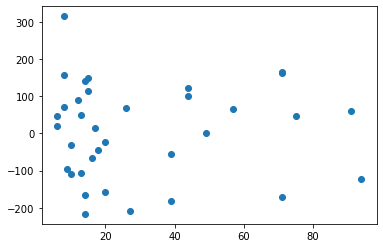

In [59]:
plt.scatter(df['hardness'], df['mortality.resid'])

(array([5., 3., 3., 4., 6., 6., 4., 3., 0., 1.]),
 array([-216.47415739, -163.36027475, -110.2463921 ,  -57.13250946,
          -4.01862681,   49.09525583,  102.20913847,  155.32302112,
         208.43690376,  261.55078641,  314.66466905]),
 <a list of 10 Patch objects>)

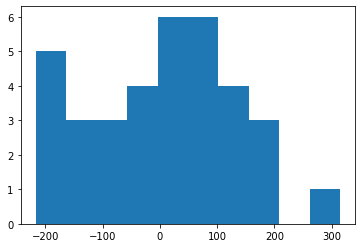

In [60]:
plt.hist(df['mortality.resid'])

**Вывод по графикам остатков**: распределение непохоже на нормальное, есть большой перекос в самом первом интервале в левой части гистограммы.
Качество модели достаточно низкое для подмножества датасета.

# Регрессионная модель для подмножества датасета - *южные* города

In [116]:
df = df_copy[ df_copy['location'] == 'South' ]

# df

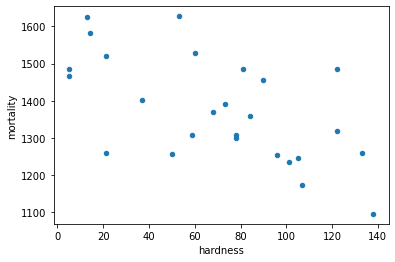

In [117]:
df.plot(kind='scatter', x='hardness', y='mortality')

**Промежуточный вывод при взгляде на график рассеяния**: можно предположить, что есть **обратная зависимость** между смертностью и содержанием кальция, выраженная примерно в той же степени, как на всем датасете.

In [77]:
# расчет коэффициента корелляции между двумя переменными средствами Pandas. По формуле Пирсона либо Кендалла либо Спирмена
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


**Коэффициент корреляции -0,60** говорит о **заметной** обратной связи (не обязательно причинно-следственной).

In [88]:
# определение параметров для линейной регрессии
# независимая переменная - датафрейм, в данном случае из одного столбца (ищем корреляцию с одной независимой переменной)
# независимая переменная - жесткость воды
X = df[['hardness']]
print(type(X))
# зависимая переменная - серия
# зависимая переменная - смертность
y = df['mortality']

# X, y

<class 'pandas.core.frame.DataFrame'>


In [89]:
# разделение на тренировочный сегмент и тестовый сегмент с помощью специального метода. 
# Random_state=42 это бестпрактис, еще можно 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(type(X_train),type(X_test),type(y_train),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [90]:
# создание объекта на основе класса
model = LinearRegression()
print(type(model))

# запуск обучения - метод класса. "Fit linear model". Механизм SciKit - Model Fitting - Supervised learning
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

# результаты модели - атрибут класса. Массив Numpy коэффициентов независимых переменных. В нашем случае один элемент.
# результаты модели - атрибут класса. Независимый член
model.coef_, model.intercept_

<class 'sklearn.linear_model._base.LinearRegression'>


(array([-3.51342921]), 1640.2204603423374)

**Уравнение линейной регрессии:**

In [91]:
lr_coef = model.coef_[0]
lr_const = model.intercept_

print(f'mortality = {lr_coef} * hardness + {lr_const}')

mortality = -3.513429212378229 * hardness + 1640.2204603423374


In [92]:
# запуск прогнозирования - метод класса. "Predict using the linear model". На входе - тестовый сегмент, независимая переменная. Механизм SciKit - Prediction - Supervised estimators
y_pred = model.predict(X_test)

In [93]:
# оценка модели - метод класса. "Return the coefficient of determination  of the prediction". На входе - тестовый сегмент, и зависимая и независимая переменная. Механизм SciKit - Evaluate Model Performance - Classification Metrics (Estomator score method)
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-2.551922301235205

 **Коэффициент детерминации вообще отрицательный**, что говорит о том, что полученная модель хуже, чем ее отсутствие.

**Сравнение результатов регрессионной модели с фактическими данными** на тестовом сегменте

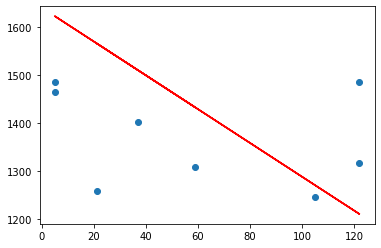

In [94]:
# вывод скаттерплота тестовых сегментов
plt.scatter(X_test, y_test)
# вывод линии тестовый сегмент независимой переменной, спрогнозированный сегмент
plt.plot(X_test, y_pred, c='r')

Фактические наблюдения распределены совсем неодинаково относительно линии регрессии. Ниже линии находится больше наблюдений, чем выше нее.

**Анализ остатков**

In [95]:
# расчет остатков на всем множестве данных
df['mortality.predicted'] = lr_coef * df['hardness'] + lr_const
df['mortality.resid'] = df['mortality'] - df['mortality.predicted']

df

<ipython-input-95-8b2f90eb036b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mortality.predicted'] = lr_coef * df['hardness'] + lr_const
<ipython-input-95-8b2f90eb036b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mortality.resid'] = df['mortality'] - df['mortality.predicted']


,Unnamed: 0,location,town,mortality,hardness,mortality.predicted,mortality.resid
0,1,South,Bath,1247,105,1271.310393,-24.310393
2,3,South,Birmingham,1466,5,1622.653314,-156.653314
7,8,South,Bournemouth,1299,78,1366.172982,-67.172982
9,10,South,Brighton,1359,84,1345.092407,13.907593
10,11,South,Bristol,1392,73,1383.740128,8.259872
12,13,South,Cardiff,1519,21,1566.438447,-47.438447
13,14,South,Coventry,1307,78,1366.172982,-59.172982
14,15,South,Croydon,1254,96,1302.931256,-48.931256
18,19,South,East Ham,1318,122,1211.582096,106.417904
19,20,South,Exeter,1260,21,1566.438447,-306.438447


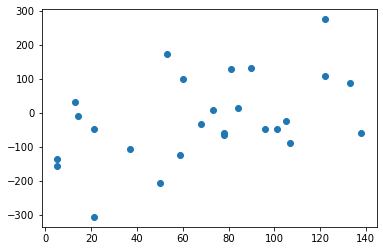

In [96]:
plt.scatter(df['hardness'], df['mortality.resid'])

(array([1., 1., 2., 3., 8., 4., 2., 3., 1., 1.]),
 array([-306.43844688, -248.35281184, -190.26717679, -132.18154175,
         -74.0959067 ,  -16.01027166,   42.07536339,  100.16099843,
         158.24663348,  216.33226852,  274.41790357]),
 <a list of 10 Patch objects>)

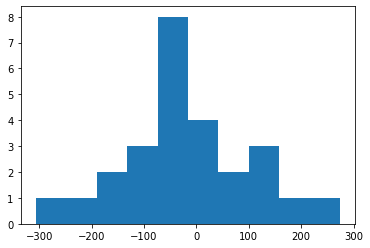

In [97]:
plt.hist(df['mortality.resid'])

**Вывод по графикам остатков**: распределение непохоже на нормальное, центр сильно смещен влево относительно 0.
Качество модели чрезвычайно низкое для данного подмножества датасета. 